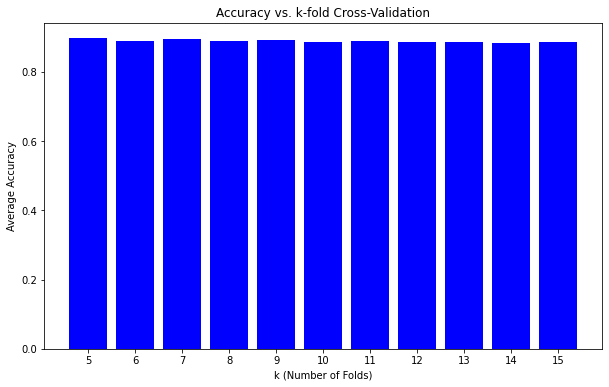

In [1]:

"""
The code starts by importing required Python libraries, including pandas for data handling, 
train_test_split for splitting the dataset, cross_val_score for performing k-fold cross-validation, 
StandardScaler for data standardization, KNeighborsClassifier for the KNN classifier,
and matplotlib.pyplot for data visualization.
"""
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Load the data

"""
The dataset is loaded from a CSV file named 'star_classification.csv' using
the pd.read_csv() function. The data is stored in a Pandas DataFrame named df.
"""
df = pd.read_csv('star_classification.csv')


# Define features (X) and target (y)

"""
The dataset is split into features (X) and the target variable (y). 
Features include various attributes, while the target variable is 'class', 
which represents the class or category of the data points.
"""
X = df[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift', 'plate', 'MJD', 'fiber_ID']]
y = df['class']

# Split data into training and testing sets

"""
The data is divided into training and testing sets using train_test_split().
80% of the data is allocated for training (X_train, y_train), and 20% is reserved 
for testing (X_test, y_test). The random_state parameter ensures reproducibility.
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data

"""
The data is standardized using StandardScaler(). 
This step scales the features to have a mean of 0 and
a standard deviation of 1, which can improve the performance
of some machine learning algorithms.
"""
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a range of k values for k-fold cross-validation

"""
A range of values for k (the number of folds in k-fold cross-validation) is defined.
The code specifies k values from 5 to 15.
"""
k_values = range(5, 16)  # Change this range as needed

# Perform k-fold cross-validation for different k values

"""
A loop iterates through the specified range of k values.
For each k value, a KNN classifier with that number of neighbors is created.
Then, cross_val_score is used to perform k-fold cross-validation on the training data. 
The mean accuracy score for each k is calculated and stored in the accuracy_scores list.
"""
accuracy_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=k)
    accuracy_scores.append(scores.mean())

# Generate a bar table for accuracy scores

"""
Finally, a bar chart is generated to visualize the average accuracy scores for different values of k. 
This chart helps you assess how the KNN classifier's performance changes with varying k values.
"""
plt.figure(figsize=(10, 6))
plt.bar([str(k) for k in k_values], accuracy_scores, color='blue')
plt.xlabel('k (Number of Folds)')
plt.ylabel('Average Accuracy')
plt.title('Accuracy vs. k-fold Cross-Validation')
plt.show()


In [2]:
# knn start

"""
-The code begins by importing the KNeighborsClassifier class from scikit-learn, 
which is necessary for creating and training a k-nearest neighbors (KNN) classifier.

-A KNN classifier is initialized with a specific value of k, 
which determines the number of neighbors used for classification. In this case, k is set to 5.

-The knn object is created, representing the KNN classifier with the chosen value of k.

-To train the KNN model, the fit() method is called, where X_train contains the training features,
and y_train contains the corresponding target labels. The model will learn patterns from the
training data, making it ready for making predictions on new, unseen data.
"""
from sklearn.neighbors import KNeighborsClassifier

# Initialize kNN classifier (you can choose the value of k)
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# Train the model
knn.fit(X_train, y_train)


KNeighborsClassifier()

              precision    recall  f1-score   support

      GALAXY       0.88      0.97      0.92     11860
        STAR       0.96      0.82      0.88      3797
         QSO       0.91      0.80      0.85      4343

    accuracy                           0.90     20000
   macro avg       0.92      0.86      0.89     20000
weighted avg       0.90      0.90      0.90     20000



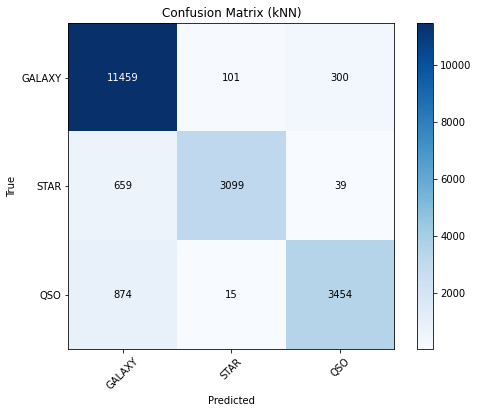

"\n-This part of the code focuses on visualizing the confusion matrix to gain a better understanding of the model's performance.\n\n-It uses Matplotlib to create a figure and set up subplots for the confusion matrix visualization. \nThe matrix is displayed as an image using a colormap for a better visual representation of the results.\n\n-Class names are defined to label the axes and cells of the confusion matrix.\n\n-Annotations are added in each cell of the matrix to display the actual values, and the color of the text is adjusted based\non whether the value is greater than half the maximum value.\n\n-Axes are labeled for clarity, and the confusion matrix visualization is displayed using plt.show().\n"

In [3]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict on the test set
y_pred = knn.predict(X_test)

# Assuming y_test contains the true labels and y_pred contains the predicted labels from kNN
report_knn = classification_report(y_test, y_pred, target_names=['GALAXY', 'STAR', 'QSO'])

# Calculate evaluation metrics
accuracy_knn = accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred, average='weighted')
recall_knn = recall_score(y_test, y_pred, average='weighted')
f1_knn = f1_score(y_test, y_pred, average='weighted')
conf_matrix_knn = confusion_matrix(y_test, y_pred)

# Print the classification report

"""
-This section of the code focuses on model evaluation. It first imports relevant functions from scikit-learn's metrics module,
which are used to assess the performance of the KNN model.

-The KNN model is used to predict labels for the test dataset (X_test), and the predicted labels are stored in y_pred.

-A classification report is generated using the classification_report function.
It provides a comprehensive summary of precision, recall, F1-score, and support 
for each class ('GALAXY,' 'STAR,' 'QSO') as well as an overall weighted average.

-Various evaluation metrics are calculated:
  accuracy_knn: The accuracy of the KNN model on the test data.
  precision_knn: The weighted precision, which takes into account precision for each class and is weighted by the number of instances in each class.
  recall_knn: The weighted recall, which is similar to precision but for recall.
  f1_knn: The weighted F1-score, which balances precision and recall.

-A confusion matrix (conf_matrix_knn) is generated to visualize the model's performance. 
The confusion matrix provides insights into the number of true positives, true negatives, false positives, and false negatives for each class.

-The classification report is printed to the console, providing detailed metrics for each class and overall model performance.
"""
print(report_knn)

import matplotlib.pyplot as plt
import numpy as np

# Assuming conf_matrix_knn contains the confusion matrix
conf_matrix_knn = np.array(conf_matrix_knn)

# Define class names
class_names = ['GALAXY', 'STAR', 'QSO']

# Create a figure and a set of subplots
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_knn, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (kNN)')
plt.colorbar()

# Add labels to the axes
num_classes = len(class_names)
plt.xticks(np.arange(num_classes), class_names, rotation=45)
plt.yticks(np.arange(num_classes), class_names)

# Add annotations in each cell
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, str(conf_matrix_knn[i, j]), ha='center', va='center', color='white' if conf_matrix_knn[i, j] > np.max(conf_matrix_knn) / 2 else 'black')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

"""
-This part of the code focuses on visualizing the confusion matrix to gain a better understanding of the model's performance.

-It uses Matplotlib to create a figure and set up subplots for the confusion matrix visualization. 
The matrix is displayed as an image using a colormap for a better visual representation of the results.

-Class names are defined to label the axes and cells of the confusion matrix.

-Annotations are added in each cell of the matrix to display the actual values, and the color of the text is adjusted based
on whether the value is greater than half the maximum value.

-Axes are labeled for clarity, and the confusion matrix visualization is displayed using plt.show().
"""


In [4]:
# weighted knn
from sklearn.neighbors import KNeighborsClassifier

# Initialize weighted kNN classifier (you can choose the value of k and weights)
k = 5
knn_weighted = KNeighborsClassifier(n_neighbors=k, weights='distance')

# Train the model
knn_weighted.fit(X_train, y_train)


"""
This code segment is similar to the previous code for initializing and training a k-nearest neighbors (KNN) classifier. 
However, in this case, the KNN classifier is "weighted" by specifying the weights parameter as 'distance.' 
This means that when making predictions, the KNN algorithm gives more weight to data points that are closer to the query point.
In other words, it considers the inverse of the distance between points as a weight. Closely located points have a higher 
influence on the prediction than distant points.

Regarding how distances are calculated in KNN:

The distance between data points in KNN is typically measured using a distance metric.
The most commonly used distance metrics are Euclidean distance and Manhattan distance,
but other metrics can also be used based on the specific problem.

Euclidean distance is the straight-line distance between two points in Euclidean space.
For two points (x1, y1) and (x2, y2) in a 2D space, the Euclidean distance is calculated as:

distance = √((x2 - x1)² + (y2 - y1)²)
This formula generalizes to higher-dimensional spaces.

Manhattan distance, on the other hand, is the sum of the absolute differences between the coordinates of two points. 
For two points (x1, y1) and (x2, y2) in a 2D space, the Manhattan distance is calculated as:

distance = |x2 - x1| + |y2 - y1|
Similar to Euclidean distance, this formula extends to higher-dimensional spaces.

In the context of KNN, the choice of distance metric, such as Euclidean or Manhattan distance, 
depends on the specific problem and the characteristics of the data.

When weights are set to 'distance' in KNN, the algorithm uses the inverse of the distance to weight
contributions from neighboring data points when making predictions. This means that closer data points
have a more significant influence on the prediction, as their weights are higher due to the smaller distance.
This is in contrast to the default option, where all neighbors are given equal weight (uniform weighting).
Weighted KNN is often preferred when you want the model to consider the influence of neighbors based on their proximity.
"""

'\nThis code segment is similar to the previous code for initializing and training a k-nearest neighbors (KNN) classifier. \nHowever, in this case, the KNN classifier is "weighted" by specifying the weights parameter as \'distance.\' \nThis means that when making predictions, the KNN algorithm gives more weight to data points that are closer to the query point.\nIn other words, it considers the inverse of the distance between points as a weight. Closely located points have a higher \ninfluence on the prediction than distant points.\n\nRegarding how distances are calculated in KNN:\n\nThe distance between data points in KNN is typically measured using a distance metric.\nThe most commonly used distance metrics are Euclidean distance and Manhattan distance,\nbut other metrics can also be used based on the specific problem.\n\nEuclidean distance is the straight-line distance between two points in Euclidean space.\nFor two points (x1, y1) and (x2, y2) in a 2D space, the Euclidean distance 

              precision    recall  f1-score   support

      GALAXY       0.89      0.96      0.92     11860
        STAR       0.96      0.82      0.89      3797
         QSO       0.91      0.81      0.86      4343

    accuracy                           0.90     20000
   macro avg       0.92      0.86      0.89     20000
weighted avg       0.91      0.90      0.90     20000



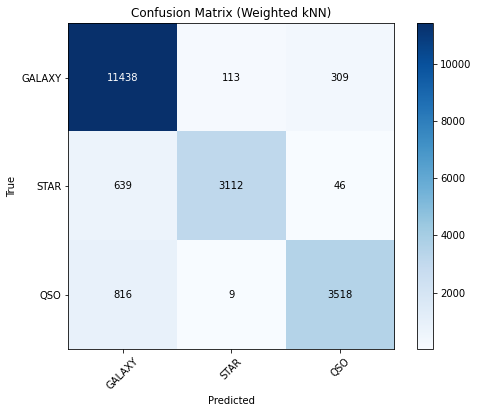

"\nMatplotlib is used to create a figure for displaying the confusion matrix, with labels and annotations.\n\nThe confusion matrix is shown as an image with a colormap (in this case, using a blue color map).\n\nClass names are defined to label both the x and y axes. They represent the true class (actual label) \non the y-axis and the predicted class on the x-axis.\n\nAnnotations are added to each cell of the matrix to display the actual values, and the color of the text\nis adjusted based on whether the value is greater than half of the maximum value in the matrix.\n\nThe axes are labeled for clarity, and the confusion matrix visualization is displayed using plt.show().\nThis visualization allows for a quick assessment of the model's performance by showing how well it predicted each class.\n"

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict on the test set
y_pred_weighted = knn_weighted.predict(X_test)

report_knn_weighted = classification_report(y_test, y_pred_weighted, target_names=['GALAXY', 'STAR', 'QSO'])

# Calculate evaluation metrics
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
precision_weighted = precision_score(y_test, y_pred_weighted, average='weighted')
recall_weighted = recall_score(y_test, y_pred_weighted, average='weighted')
f1_weighted = f1_score(y_test, y_pred_weighted, average='weighted')
conf_matrix_weighted = confusion_matrix(y_test, y_pred_weighted)

print(report_knn_weighted)

"""
In this code section, the performance evaluation of the weighted KNN model is conducted,
similar to the previous section. Relevant evaluation metrics are calculated and printed, 
and a classification report is generated.

The model's predictions for the test dataset are made using the predict() method, 
and the predicted labels are stored in y_pred_weighted.

A classification report is created using classification_report. It provides detailed 
information on precision, recall, F1-score, and support for each class ('GALAXY,' 'STAR,' 'QSO'), as well as an overall weighted average.

Various evaluation metrics are calculated for the weighted KNN model, including:

accuracy_weighted: The accuracy of the model on the test data.
precision_weighted: The weighted precision, which considers precision for each class and is weighted by the number of instances in each class.
recall_weighted: The weighted recall, which is similar to precision but for recall.
f1_weighted: The weighted F1-score, which balances precision and recall.

A confusion matrix (conf_matrix_weighted) is generated to visualize the model's performance.

The classification report is printed to the console, providing detailed metrics for each class and overall model performance.
"""

import matplotlib.pyplot as plt
import numpy as np

# Assuming conf_matrix_knn contains the confusion matrix
conf_matrix_weighted = np.array(conf_matrix_weighted)

# Define class names
class_names = ['GALAXY', 'STAR', 'QSO']

# Create a figure and a set of subplots
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_weighted, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Weighted kNN)')
plt.colorbar()

# Add labels to the axes
num_classes = len(class_names)
plt.xticks(np.arange(num_classes), class_names, rotation=45)
plt.yticks(np.arange(num_classes), class_names)

# Add annotations in each cell
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, str(conf_matrix_weighted[i, j]), ha='center', va='center', color='white' if conf_matrix_weighted[i, j] > np.max(conf_matrix_weighted) / 2 else 'black')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


"""
Matplotlib is used to create a figure for displaying the confusion matrix, with labels and annotations.

The confusion matrix is shown as an image with a colormap (in this case, using a blue color map).

Class names are defined to label both the x and y axes. They represent the true class (actual label) 
on the y-axis and the predicted class on the x-axis.

Annotations are added to each cell of the matrix to display the actual values, and the color of the text
is adjusted based on whether the value is greater than half of the maximum value in the matrix.

The axes are labeled for clarity, and the confusion matrix visualization is displayed using plt.show().
This visualization allows for a quick assessment of the model's performance by showing how well it predicted each class.
"""

In [6]:
# naive bayes
from sklearn.naive_bayes import GaussianNB

# Initialize Gaussian Naive Bayes classifier
nb = GaussianNB()

# Train the model
nb.fit(X_train, y_train)

"""
In this code snippet, the Gaussian Naive Bayes classifier (GaussianNB) is imported from scikit-learn.
Naive Bayes is a probabilistic machine learning algorithm used for classification tasks.

A Gaussian Naive Bayes classifier is initialized using the GaussianNB() class.
This specific version of Naive Bayes is suitable for continuous or real-valued data,
as it assumes that the features follow a Gaussian (normal) distribution.

The nb object represents the Naive Bayes classifier initialized with default parameters.

The fit() method is used to train the Naive Bayes model. It takes the training data X_train 
(features) and y_train (target labels) as input and learns a probabilistic model based on the training data.
Naive Bayes works by estimating class conditional probabilities from the data to make predictions.

What is Naive Bayes?

Naive Bayes is a classification algorithm based on Bayes' theorem. It's considered "naive" because
it makes a strong and often unrealistic assumption that features are conditionally independent
given the class label. In other words, it assumes that the presence of one feature does not affect
the presence of another feature, which is a simplification made to make the computations more tractable.

Key concepts of Naive Bayes:

Bayes' Theorem: The algorithm is based on Bayes' theorem, which calculates the probability of a
particular event happening based on prior knowledge of conditions related to the event. In the
context of classification, Bayes' theorem is used to estimate the probability that a data point 
belongs to a particular class given its feature values.

Class Conditional Independence: Naive Bayes assumes that the features are conditionally independent 
given the class. This means that the algorithm assumes that knowing the value of one feature doesn't
provide any information about the value of any other feature, given the class label.

Probabilistic Model: Naive Bayes models the likelihood of each feature value for each class as a
probability distribution (e.g., Gaussian distribution for continuous features, Multinomial or Bernoulli 
distributions for discrete data).

Classification: To classify a new data point, Naive Bayes calculates the posterior probability for 
each class and selects the class with the highest probability as the predicted class.

Naive Bayes is often used for text classification tasks (e.g., spam detection, sentiment analysis), 
but it can be applied to a wide range of classification problems. It's computationally efficient and
works well when the independence assumption holds reasonably well for the dataset.
"""

'\nIn this code snippet, the Gaussian Naive Bayes classifier (GaussianNB) is imported from scikit-learn.\nNaive Bayes is a probabilistic machine learning algorithm used for classification tasks.\n\nA Gaussian Naive Bayes classifier is initialized using the GaussianNB() class.\nThis specific version of Naive Bayes is suitable for continuous or real-valued data,\nas it assumes that the features follow a Gaussian (normal) distribution.\n\nThe nb object represents the Naive Bayes classifier initialized with default parameters.\n\nThe fit() method is used to train the Naive Bayes model. It takes the training data X_train \n(features) and y_train (target labels) as input and learns a probabilistic model based on the training data.\nNaive Bayes works by estimating class conditional probabilities from the data to make predictions.\n\nWhat is Naive Bayes?\n\nNaive Bayes is a classification algorithm based on Bayes\' theorem. It\'s considered "naive" because\nit makes a strong and often unrealis

              precision    recall  f1-score   support

      GALAXY       0.75      0.86      0.80     11860
        STAR       0.58      0.88      0.70      3797
         QSO       0.98      0.16      0.27      4343

    accuracy                           0.71     20000
   macro avg       0.77      0.63      0.59     20000
weighted avg       0.77      0.71      0.67     20000



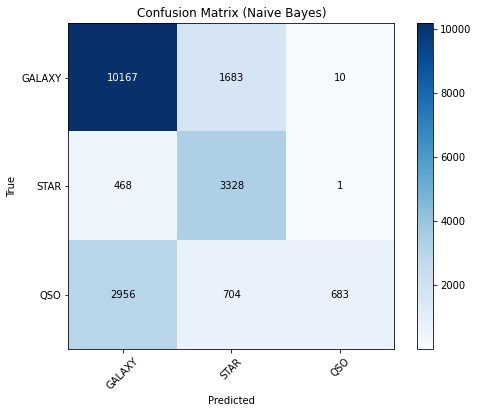

"\nThis part of the code focuses on visualizing the confusion matrix for the Naive Bayes model. \nIt uses Matplotlib to create a figure and set up subplots for the confusion matrix visualization,\nsimilar to the previous code sections.\n\nClass names are defined to label both the x and y axes. They represent the true class (actual label)\non the y-axis and the predicted class on the x-axis.\n\nAnnotations are added to each cell of the matrix to display the actual values, with the color of\nthe text adjusted based on whether the value is greater than half of the maximum value in the matrix.\n\nAxes are labeled for clarity, and the confusion matrix visualization is displayed using plt.show().\nThis visualization allows for a quick assessment of the Naive Bayes model's performance by showing \nhow well it predicted each class.\n"

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict on the test set
y_pred_nb = nb.predict(X_test)

report_nb = classification_report(y_test, y_pred_nb, target_names=['GALAXY', 'STAR', 'QSO'])

# Calculate evaluation metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

print(report_nb)

"""
In this code section, the performance evaluation of the Naive Bayes (NB) model is conducted.
Relevant evaluation metrics are calculated, a classification report is generated, and the confusion matrix is visualized.

The model's predictions for the test dataset are made using the predict() method, and the predicted labels are stored in y_pred_nb.

A classification report is created using classification_report. It provides detailed information on precision, recall,
F1-score, and support for each class ('GALAXY,' 'STAR,' 'QSO'), as well as an overall weighted average.

Various evaluation metrics are calculated for the NB model, including:

    accuracy_nb: The accuracy of the model on the test data.
    precision_nb: The weighted precision, which considers precision for each class and is weighted by the number of instances in each class.
    recall_nb: The weighted recall, which is similar to precision but for recall.
    f1_nb: The weighted F1-score, which balances precision and recall.

A confusion matrix (conf_matrix_nb) is generated to visualize the model's performance.

The classification report is printed to the console, providing detailed metrics for each class and overall model performance.
"""

# Print the evaluation metrics
import matplotlib.pyplot as plt
import numpy as np

# Assuming conf_matrix_knn contains the confusion matrix
conf_matrix_nb = np.array(conf_matrix_nb)

# Define class names
class_names = ['GALAXY', 'STAR', 'QSO']

# Create a figure and a set of subplots
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_nb, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Naive Bayes)')
plt.colorbar()

# Add labels to the axes
num_classes = len(class_names)
plt.xticks(np.arange(num_classes), class_names, rotation=45)
plt.yticks(np.arange(num_classes), class_names)

# Add annotations in each cell
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, str(conf_matrix_nb[i, j]), ha='center', va='center', color='white' if conf_matrix_nb[i, j] > np.max(conf_matrix_nb) / 2 else 'black')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


"""
This part of the code focuses on visualizing the confusion matrix for the Naive Bayes model. 
It uses Matplotlib to create a figure and set up subplots for the confusion matrix visualization,
similar to the previous code sections.

Class names are defined to label both the x and y axes. They represent the true class (actual label)
on the y-axis and the predicted class on the x-axis.

Annotations are added to each cell of the matrix to display the actual values, with the color of
the text adjusted based on whether the value is greater than half of the maximum value in the matrix.

Axes are labeled for clarity, and the confusion matrix visualization is displayed using plt.show().
This visualization allows for a quick assessment of the Naive Bayes model's performance by showing 
how well it predicted each class.
"""


In [8]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

"""
In this code snippet, the Random Forest classifier is imported from scikit-learn.
Random Forest is an ensemble learning technique used for both classification and regression tasks.

A Random Forest classifier is initialized using the RandomForestClassifier class.
It's configured with a total of 100 decision trees (n_estimators=100) in the forest.
The random_state parameter is set to 42 to ensure reproducibility. Random Forest
builds multiple decision trees and combines their predictions to make more accurate and robust predictions.

The rf object represents the Random Forest classifier initialized with the specified parameters.

The fit() method is used to train the Random Forest model. It takes the training data X_train (features) and y_train (target labels) as input and builds an ensemble of decision trees based on the training data.


Random Forest Overview:

Random Forest is an ensemble method that combines the predictions of multiple decision trees
to improve accuracy and reduce overfitting. Key concepts include:

Ensemble Learning: It combines the predictions from multiple base models (decision trees in
this case) to make more reliable and robust predictions.

Decision Trees: Each tree in the Random Forest is a decision tree. Decision trees are used 
to make binary decisions based on input features.

Bootstrapping: Random Forest uses bootstrapping to create multiple subsets of the training 
data with replacement. Each tree is trained on a different subset, adding diversity to the ensemble.

Random Feature Selection: For each split in a tree, only a random subset of features is considered.
This adds more randomness to the model and reduces overfitting.

Voting: In classification tasks, the mode (most frequent) class prediction is used as the final prediction.

Averaging: In regression tasks, the average of the individual tree predictions is used as the final prediction.
"""

"\nIn this code snippet, the Random Forest classifier is imported from scikit-learn.\nRandom Forest is an ensemble learning technique used for both classification and regression tasks.\n\nA Random Forest classifier is initialized using the RandomForestClassifier class.\nIt's configured with a total of 100 decision trees (n_estimators=100) in the forest.\nThe random_state parameter is set to 42 to ensure reproducibility. Random Forest\nbuilds multiple decision trees and combines their predictions to make more accurate and robust predictions.\n\nThe rf object represents the Random Forest classifier initialized with the specified parameters.\n\nThe fit() method is used to train the Random Forest model. It takes the training data X_train (features) and y_train (target labels) as input and builds an ensemble of decision trees based on the training data.\n\n\nRandom Forest Overview:\n\nRandom Forest is an ensemble method that combines the predictions of multiple decision trees\nto improve ac

              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98     11860
        STAR       0.97      0.93      0.95      3797
         QSO       0.99      1.00      1.00      4343

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000



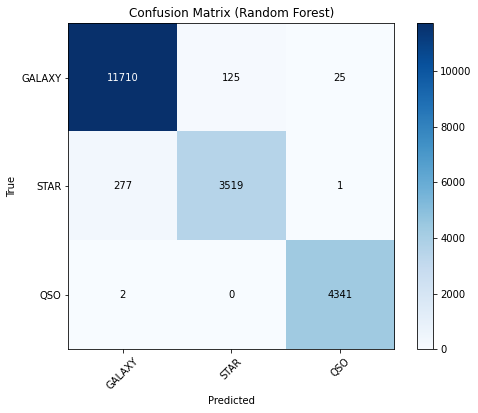

"\nThis part of the code focuses on visualizing the confusion matrix for the Random Forest model.\nIt uses Matplotlib to create a figure and set up subplots for the confusion matrix visualization, \nsimilar to the previous code sections.\n\nClass names are defined to label both the x and y axes. They represent the true class (actual label)\non the y-axis and the predicted class on the x-axis.\n\nAnnotations are added to each cell of the matrix to display the actual values, with the color of\nthe text adjusted based on whether the value is greater than half of the maximum value in the matrix.\n\nAxes are labeled for clarity, and the confusion matrix visualization is displayed using plt.show().\nThis visualization allows for a quick assessment of the Random Forest model's performance by showing how well it predicted each class.\n"

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict on the test set
y_pred_rf = rf.predict(X_test)

report_rf = classification_report(y_test, y_pred_rf, target_names=['GALAXY', 'STAR', 'QSO'])

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(report_rf)

"""
In this code section, the performance evaluation of the Random Forest (RF) model is conducted.
Relevant evaluation metrics are calculated, a classification report is generated, and the confusion matrix is visualized.

The model's predictions for the test dataset are made using the predict() method, and the predicted
labels are stored in y_pred_rf.

A classification report is created using classification_report. It provides detailed information on precision,
recall, F1-score, and support for each class ('GALAXY,' 'STAR,' 'QSO'), as well as an overall weighted average.

Various evaluation metrics are calculated for the RF model, including:
    accuracy_rf: The accuracy of the model on the test data.
    precision_rf: The weighted precision, which considers precision for each class and is weighted by the number of instances in each class.
    recall_rf: The weighted recall, which is similar to precision but for recall.
    f1_rf: The weighted F1-score, which balances precision and recall.

A confusion matrix (conf_matrix_rf) is generated to visualize the model's performance.

The classification report is printed to the console, providing detailed metrics for each class and overall model performance.
"""


# Print the evaluation metrics
import matplotlib.pyplot as plt
import numpy as np

# Assuming conf_matrix_knn contains the confusion matrix
conf_matrix_rf = np.array(conf_matrix_rf)

# Define class names
class_names = ['GALAXY', 'STAR', 'QSO']

# Create a figure and a set of subplots
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_rf, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Random Forest)')
plt.colorbar()

# Add labels to the axes
num_classes = len(class_names)
plt.xticks(np.arange(num_classes), class_names, rotation=45)
plt.yticks(np.arange(num_classes), class_names)

# Add annotations in each cell
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, str(conf_matrix_rf[i, j]), ha='center', va='center', color='white' if conf_matrix_rf[i, j] > np.max(conf_matrix_rf) / 2 else 'black')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

"""
This part of the code focuses on visualizing the confusion matrix for the Random Forest model.
It uses Matplotlib to create a figure and set up subplots for the confusion matrix visualization, 
similar to the previous code sections.

Class names are defined to label both the x and y axes. They represent the true class (actual label)
on the y-axis and the predicted class on the x-axis.

Annotations are added to each cell of the matrix to display the actual values, with the color of
the text adjusted based on whether the value is greater than half of the maximum value in the matrix.

Axes are labeled for clarity, and the confusion matrix visualization is displayed using plt.show().
This visualization allows for a quick assessment of the Random Forest model's performance by showing how well it predicted each class.
"""

In [10]:
# svm
from sklearn.svm import SVC

# Initialize SVM classifier
svm = SVC(kernel='rbf', random_state=42)

# Train the model
svm.fit(X_train, y_train)

"""
In this code snippet, the Support Vector Machine (SVM) classifier is imported from scikit-learn.
SVM is a powerful supervised learning algorithm used for classification and regression tasks.

An SVM classifier is initialized using the SVC class. It's configured with an RBF kernel (kernel='rbf')
that is suitable for handling non-linear classification problems. The random_state parameter is set to 42 to ensure reproducibility.

The svm object represents the SVM classifier initialized with the specified parameters.

The fit() method is used to train the SVM model. It takes the training data X_train (features) 
and y_train (target labels) as input and learns a decision boundary that maximizes the margin 
between different classes. SVM is known for its effectiveness in handling non-linear and high-dimensional data.

Support Vector Machine (SVM) Overview:

SVM is a powerful machine learning algorithm with the following key concepts:

    Margin: SVM aims to find a decision boundary that maximizes the margin between different classes.
    The margin is the distance between the boundary and the nearest data points (support vectors) from each class.
    
    Kernel Functions: SVM can use different kernel functions to handle non-linear classification problems. 
    The RBF kernel (radial basis function) is commonly used for non-linear data.
    
    Support Vectors: These are the data points that are closest to the decision boundary and play a crucial role in defining the margin.
    
    Hyperplane: In a linear SVM, the decision boundary is represented by a hyperplane, which is a flat affine subspace of 
    one dimension less than the input space.
    
    C Parameter: The regularization parameter C controls the trade-off between maximizing the margin and minimizing classification errors.
    A smaller C value encourages a larger margin but may tolerate some misclassifications.
    
    Gamma Parameter: In the case of the RBF kernel, the gamma parameter controls the shape of the decision boundary.
    Smaller values of gamma result in a smoother decision boundary.
"""


"\nIn this code snippet, the Support Vector Machine (SVM) classifier is imported from scikit-learn.\nSVM is a powerful supervised learning algorithm used for classification and regression tasks.\n\nAn SVM classifier is initialized using the SVC class. It's configured with an RBF kernel (kernel='rbf')\nthat is suitable for handling non-linear classification problems. The random_state parameter is set to 42 to ensure reproducibility.\n\nThe svm object represents the SVM classifier initialized with the specified parameters.\n\nThe fit() method is used to train the SVM model. It takes the training data X_train (features) \nand y_train (target labels) as input and learns a decision boundary that maximizes the margin \nbetween different classes. SVM is known for its effectiveness in handling non-linear and high-dimensional data.\n\nSupport Vector Machine (SVM) Overview:\n\nSVM is a powerful machine learning algorithm with the following key concepts:\n\n    Margin: SVM aims to find a decision

              precision    recall  f1-score   support

      GALAXY       0.96      0.97      0.97     11860
        STAR       0.97      0.89      0.93      3797
         QSO       0.94      0.99      0.96      4343

    accuracy                           0.96     20000
   macro avg       0.96      0.95      0.95     20000
weighted avg       0.96      0.96      0.96     20000



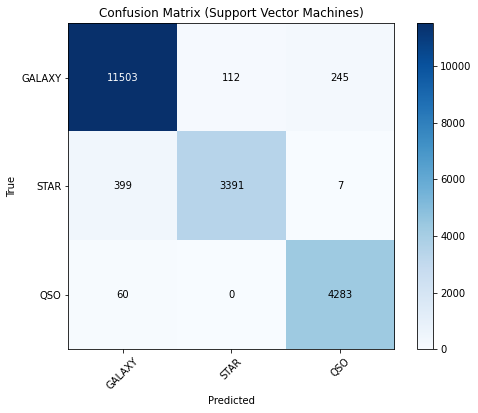

"\nThis part of the code focuses on visualizing the confusion matrix for the Support Vector Machine (SVM) model.\nIt uses Matplotlib to create a figure and set up subplots for the confusion matrix visualization, similar to\nthe previous code sections.\n\nClass names are defined to label both the x and y axes. They represent the true class (actual label) on the\ny-axis and the predicted class on the x-axis.\n\nAnnotations are added to each cell of the matrix to display the actual values, with the color of the text\nadjusted based on whether the value is greater than half of the maximum value in the matrix.\n\nAxes are labeled for clarity, and the confusion matrix visualization is displayed using plt.show(). This\nvisualization allows for a quick assessment of the Support Vector Machine (SVM) model's performance by showing how well it predicted each class.\n"

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report

# Predict on the test set
y_pred_svm = svm.predict(X_test)
report_svm = classification_report(y_test, y_pred_svm, target_names=['GALAXY', 'STAR', 'QSO'])

# Calculate evaluation metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

report = classification_report(y_test, y_pred_svm, target_names=['GALAXY', 'STAR', 'QSO'])
print(report)

"""
In this code section, the performance evaluation of the Support Vector Machine (SVM) model is conducted. 
Relevant evaluation metrics are calculated, a classification report is generated, and the confusion matrix is visualized.

The model's predictions for the test dataset are made using the predict() method, and the predicted labels are stored in y_pred_svm.

A classification report is created using classification_report. It provides detailed information on precision, 
recall, F1-score, and support for each class ('GALAXY,' 'STAR,' 'QSO'), as well as an overall weighted average.

Various evaluation metrics are calculated for the SVM model, including:

    accuracy_svm: The accuracy of the model on the test data.
    precision_svm: The weighted precision, which considers precision for each class and is weighted by the number of instances in each class.
    recall_svm: The weighted recall, which is similar to precision but for recall.
    f1_svm: The weighted F1-score, which balances precision and recall.

A confusion matrix (conf_matrix_svm) is generated to visualize the model's performance.

The classification report is printed to the console, providing detailed metrics for each class and overall model performance.
"""

import matplotlib.pyplot as plt
import numpy as np

# Assuming conf_matrix_knn contains the confusion matrix
conf_matrix_svm = np.array(conf_matrix_svm)

# Define class names
class_names = ['GALAXY', 'STAR', 'QSO']

# Create a figure and a set of subplots
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_svm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Support Vector Machines)')
plt.colorbar()

# Add labels to the axes
num_classes = len(class_names)
plt.xticks(np.arange(num_classes), class_names, rotation=45)
plt.yticks(np.arange(num_classes), class_names)

# Add annotations in each cell
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, str(conf_matrix_svm[i, j]), ha='center', va='center', color='white' if conf_matrix_svm[i, j] > np.max(conf_matrix_svm) / 2 else 'black')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

"""
This part of the code focuses on visualizing the confusion matrix for the Support Vector Machine (SVM) model.
It uses Matplotlib to create a figure and set up subplots for the confusion matrix visualization, similar to
the previous code sections.

Class names are defined to label both the x and y axes. They represent the true class (actual label) on the
y-axis and the predicted class on the x-axis.

Annotations are added to each cell of the matrix to display the actual values, with the color of the text
adjusted based on whether the value is greater than half of the maximum value in the matrix.

Axes are labeled for clarity, and the confusion matrix visualization is displayed using plt.show(). This
visualization allows for a quick assessment of the Support Vector Machine (SVM) model's performance by showing how well it predicted each class.
"""

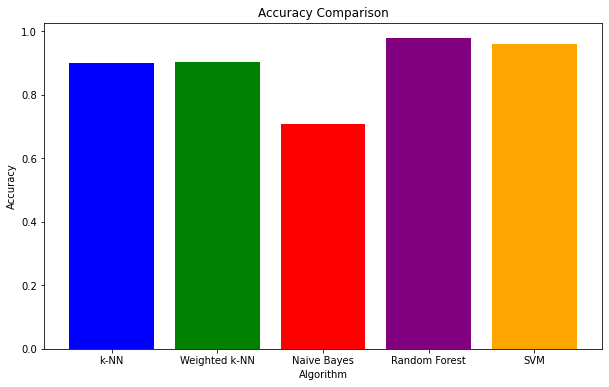

'\nIn this code snippet, the code is focused on creating a bar chart for comparing the accuracy of different machine learning algorithms.\n\nIt uses Matplotlib, a popular Python library for data visualization. The plt module from Matplotlib is used to create and customize the chart.\n\nTwo lists, algorithm_names and accuracy_values, are defined. algorithm_names contains the names of different algorithms, and accuracy_values\ncontains the corresponding accuracy values for each algorithm.\n\nA bar chart is created using plt.bar(). The algorithm_names are used as the x-axis labels, and the accuracy_values are used as the heights \nof the bars. The color parameter specifies the colors for each bar.\n\nLabels are added to the x-axis and y-axis using plt.xlabel() and plt.ylabel(), respectively.\n\nA title for the chart is set using plt.title().\n\nFinally, plt.show() is used to display the bar chart.\n'

In [12]:
import matplotlib.pyplot as plt

# Define algorithm names and their respective accuracy values
algorithm_names = ['k-NN', 'Weighted k-NN', 'Naive Bayes', 'Random Forest', 'SVM']
accuracy_values = [accuracy_knn, accuracy_weighted, accuracy_nb, accuracy_rf, accuracy_svm]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(algorithm_names, accuracy_values, color=['blue', 'green', 'red', 'purple', 'orange'])

# Add labels and title
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')

# Show the plot
plt.show()

"""
In this code snippet, the code is focused on creating a bar chart for comparing the accuracy of different machine learning algorithms.

It uses Matplotlib, a popular Python library for data visualization. The plt module from Matplotlib is used to create and customize the chart.

Two lists, algorithm_names and accuracy_values, are defined. algorithm_names contains the names of different algorithms, and accuracy_values
contains the corresponding accuracy values for each algorithm.

A bar chart is created using plt.bar(). The algorithm_names are used as the x-axis labels, and the accuracy_values are used as the heights 
of the bars. The color parameter specifies the colors for each bar.

Labels are added to the x-axis and y-axis using plt.xlabel() and plt.ylabel(), respectively.

A title for the chart is set using plt.title().

Finally, plt.show() is used to display the bar chart.
"""